# Figure 2 — Phage-assisted non-continuous evolution of hyperactive AraC variants.
---
Unless explicitly noted otherwise (e.g. indicated as being from Zenodo), all data used for the visualisations was generated using the Illumina or Nanopore pipeline.
Please make sure to download the input dataset `Flow_cytometry_raw_data` from the Zenodo repository and place it in a folder named `data` at root repository level.

For more information, please refer to the `README.md`.

### Figure Summary

<div style="text-indent:-2em; padding-left:2em"><strong>(A) Schematic of the used mutagenesis system </strong></div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(B) Positive selection circuit. </strong></div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(C) Summary of the AraC PANCE campaign.</strong></div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(D) Genotypic analysis of evolved AraC variants.</strong></div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(E) Visual screening of AraC variants using an mRFP reporter assay.</strong></div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(F) Quantification of AraC variant activity.</strong></div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(G)Flow cytometry analysis of WT AraC and R2 variant.</strong></div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(H) Negative selection circuit. </strong></div>  
<div style="text-indent:-2em; padding-left:2em"><strong>(I) Head-to-head competition assay between WT AraC and R2 under negative selection</strong></div>  


## Figure 2A: Schematic of the used mutagenesis system
----------------------------
In the plLacO1-DP6 circuit, infection with a
selection phage (SP) and addition of anhydrotetracycline (aTc) induce gIII expression and enable
phage propagation, while IPTG addition activates a mutagenesis operon that diversifies the SP
genome. Figure created with Adobe Illustrator.


![Figure 2A](figure_illustrations/Figure_2A.png)

## Figure 2B: Positive selection circuit
----------------------------
SPs encoding active AraC variants induce gIII expression
via the pBAD promoter. Right: Arabinose-dependent propagation of an SP encoding WT AraC,
demonstrating induction-dependent propagation. Bars represent mean ± Standard Error of the
Mean (S.E.M.) of three biological replicates, as quantified by qPCR. Corresponding phage
plaque assay shown in Fig. S1B. Figure created with Adobe Illustrator.


![Alt Text](figure_illustrations/Figure_2B.png)

## Figure 2C: Summary of the AraC PANCE campaign.
----------------------------
Phage titers from
each day (D1-10) are shown in Fig. S1C, D.  Figure created with Adobe Illustrator.


![Alt Text](figure_illustrations/Figure_2C.png)

## Figure 2D: Genotypic analysis of evolved AraC variants.
----------------------------
Pooled phage populations and one individual plaque from the final selection day (D10) were
sequenced, revealing six distinct variants (R1–R6). Figure created with Adobe Illustrator. 


![Alt Text](figure_illustrations/Figure_2D.png)

## Figure 2E+F: Visual screening of AraC variants using an mRFP reporter assay and quantification of AraC variant activity.
----------------------------
WT AraC and evolved variants (R1–R6)
were expressed from a LacI-dependent expression cassette containing the SD4 RBS and co-
transformed with a pBAD regulated mRFP reporter plasmid (Fig. S1E). Cultures were grown
without IPTG or Arabinose. Quantification of AraC variant activity. AraC variants were
expressed as in E, but using the weaker sd2 RBS. RFP fluorescence normalized to OD600 was
measured in the presence or absence of 10 mM L-arabinose in a plate reader. Data shown as
mean ± S.E.M. from n = 3 biological replicates. Figure created with Adobe Illustrator and GraphPad Prism.


![Alt Text](figure_illustrations/Figure_2E+F.png)

## Figure 2G: Flow cytometry analysis of WT AraC and R2 variant. 
----------------------------

Reporter fluorescence was quantified in presence or absence of 16 mM L-arabinose.
Gating strategy described in fig. S2A.

**Note:** The following analysis uses the `cytoflow` package, which is incompatible with modern versions of `seaborn`, `matplotlib`, and `numpy`.  To avoid conflicts, run the Cytoflow section in a **separate virtual environment**. 

You can create and activate the required environment as follows:

```bash
# Add the Cytoflow conda channel
conda config --add channels bpteague

# Create and activate the environment
conda create --name cf cytoflow notebook
conda activate cf


#### Setup

Run the following cell to import all required libraries, define plotting settings, and configure the environment for data analysis and visualization.

In [ ]:
# --- Import necessary modules ---
import cytoflow
from cytoflow import *
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import math

# --- Seaborn theme configuration ---
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 1
}
sns.set_theme(context="paper", style='ticks', palette="Greys_r", rc=custom_params)

# --- General matplotlib settings ---
fs = 8  # font size
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({
    'font.family': 'Avenir Next',
    'font.weight': 'demi', 
    'font.size': fs,
    'text.color': '#231F20',
    'axes.labelcolor': '#231F20',
    'xtick.color': '#231F20',
    'ytick.color': '#231F20',
    'axes.edgecolor': '#231F20',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'pdf.fonttype': 42,
    'text.usetex': False
})
sns.set_context("paper", rc={
    "font.size": fs,
    "axes.titlesize": fs + 1,
    "axes.labelsize": fs,
    "axes.linewidth": 1,
    "xtick.labelsize": fs,
    "ytick.labelsize": fs,
    "legend.fontsize": fs,
    "legend.title_fontsize": fs + 1
})


In [7]:
# --- Import FACS Data ---
op_0 = ImportOp(
    conditions={'CF_File': 'category'}, # Define metadata column
    tubes=[
        # Each Tube corresponds to one .fcs file (one sample)
        # `conditions` adds a label to each tube for grouping
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/13_sd2_AraC_WT_dark.fcs',
            conditions={'CF_File': '13_sd2_AraC_WT_dark'}),
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/14_sd2_AraC_R2_dark.fcs',
            conditions={'CF_File': '14_sd2_AraC_R2_dark'}),
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/19_sd2_AraC_WT_Arabinose_dark.fcs',
            conditions={'CF_File': '19_sd2_AraC_WT_Arabinose_dark'}),
        Tube(
            file=
            f'{repo_root}/data/Flow_cytometry_raw_data/20_sd2_AraC_R2_Arabinose_dark.fcs',
            conditions={'CF_File': '20_sd2_AraC_R2_Arabinose_dark'})
    ],
    # Rename FACS channels to readable names
    channels={
        'FSC-A': 'FSC_A',
        'FSC-H': 'FSC_H',
        'SSC-A': 'SSC_A',
        'SSC-H': 'SSC_H',
        'Y610-A': 'Y610_A', # Fluorescence channel
    })

# Apply the import operation and load data into an experiment object
ex_0 = op_0.apply()

# --- Gate for E. coli population ---
op_1 = PolygonOp(name='Ecoli',
                 xchannel='SSC_A',
                 ychannel='FSC_A',
                 vertices=[(1357.9732606179289, 275.05545196062917),
                           (3096.358586276033, 130.4833062471451),
                           (30016.169863090054, 22463.177752089905),
                           (21981.80211486695, 58220.89159406637),
                           (742.6137843756184, 6004.526015249525),
                           (818.5434737539503, 698.6374935564252)],
                 xscale='log',
                 yscale='log')

# Apply E. coli gating to data
ex_1 = op_1.apply(ex_0)

# --- Gate for singlet cells ---
op_2 = PolygonOp(name='Singlets',
                 xchannel='SSC_A',
                 ychannel='SSC_H',
                 vertices=[(720.9528536391655, 715.2244917579866),
                           (2415.7462968326668, 1718.2013652044473),
                           (81537.30363552464, 51916.855303397606),
                           (54488.91914190919, 63080.21963700783),
                           (575.8161707505337, 949.4559941564318)],
                 xscale='log',
                 yscale='log')

# Apply singlet gating
ex_2 = op_2.apply(ex_1)

# --- Filter gated population ---
# Keep only events that passed both 'Ecoli' and 'Singlets' gates
ex_2.data = ex_2.data[ex_2.data['Ecoli']==True]
ex_2.data = ex_2.data[ex_2.data['Singlets']==True]
# --- Downsample ---
# Take a random sample of 15,000 events per CF_File to normalize cell counts
ex_2.data = ex_2.data.groupby('CF_File').apply(lambda x: x.sample(15000)).reset_index(drop=True)
# --- Compute statistics ---
# Calculate the median fluorescence (Y610_A) per sample
stats = ex_2.data.groupby(['CF_File']).median().reset_index()

colors = ['#93959866', "#e29385"]

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/cytoflow/utility/log_scale.py:117: RuntimeWarning: invalid value encountered in log10


In [5]:
def FACS_hist(title, input_samples, label_names, colors, stats):
    # --- Plot aesthetics ---
    sns.set(style="white")
    sns.set(font_scale=1.5)
    sns.set_style('ticks')
    plt.rcParams["figure.figsize"] = (5, 5)
    plt.rcParams["axes.linewidth"] = 3
    plt.rcParams["xtick.major.width"] = 3
    plt.rcParams["xtick.minor.width"] = 3
    plt.rcParams["ytick.major.width"] = 3   
    plt.xlabel('log[RFP]')

    # --- Subset data ---
    subset = ex_2.data[ex_2.data['CF_File'].isin(input_samples)].copy()
    subset['Y610_A'].replace(0, 0.001, inplace=True)
    subset['Y610_A'] = pd.to_numeric(subset['Y610_A'], errors='coerce')
    plt.gca().set_xlim((1, max(subset['Y610_A'])))

    # --- Custom legend ---
    handles = [Patch(facecolor=color, label=label) for label, color in zip(label_names, colors)]

    # --- Filled KDE curves (with color) ---
    sns.kdeplot(
        data=subset,
        x='Y610_A',
        hue=subset['CF_File'].cat.remove_unused_categories(),
        cut=0,
        fill=True,
        common_norm=False,
        alpha=0.5,
        log_scale=True,
        palette=colors,
        linewidth=0
    )

    # --- Overlay black KDE outlines manually for each sample ---
    for input_sample in input_samples:
        subset_single = subset[subset['CF_File'] == input_sample]
        sns.kdeplot(
            data=subset_single,
            x='Y610_A',
            cut=0,
            fill=False,
            common_norm=False,
            log_scale=True,
            color='black',
            linewidth=3
        )

    sns.despine()

    # --- Legend ---
    plt.legend(handles=handles, labels=label_names, frameon=False, loc='center', bbox_to_anchor=(1.3, 0.5))

    # --- Limits ---
    plt.ylim(0, 2.5)
    plt.xlim(1, 10_000_000)

    plt.show()

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10


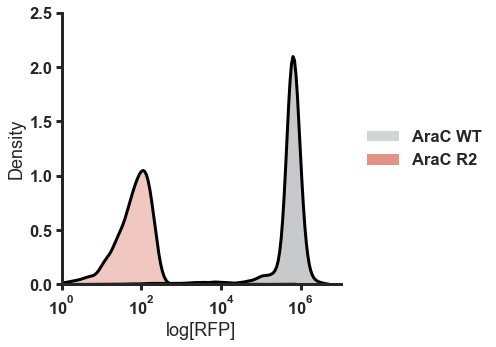

In [6]:
FACS_hist('Title-1', ['13_sd2_AraC_WT_dark', '14_sd2_AraC_R2_dark'], ['AraC WT', 'AraC R2'], ['#93959866', "#e29385"], stats)

/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10
/Users/alicehovsepyan/opt/miniconda3/envs/cf/lib/python3.6/site-packages/seaborn/_core.py:1060: RuntimeWarning: invalid value encountered in log10


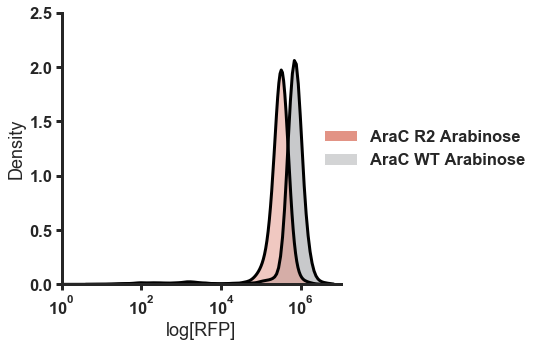

In [7]:
FACS_hist('Title-1', ['19_sd2_AraC_WT_Arabinose_dark', '20_sd2_AraC_R2_Arabinose_dark'], [ 'AraC R2 Arabinose', 'AraC WT Arabinose'], ["#e29385", '#93959866'], stats)


## Figure 2H: Negative selection circuit. 
----------------------------
SPs
encoding active AraC variants induce expression of a dominant-negative form of gIII (pIII-Neg)
from the pBAD promoter, preventing phage host cell escape. Concurrently, IPTG induction
drives WT gIII expression to support propagation. Figure created with Adobe Illustrator.


![Alt Text](figure_illustrations/Figure_2H.png)

## Figure 2I: Head-to-head competition assay between WT AraC and R2 under negative selection
----------------------------
Host cells harboring APProp and APNeg were infected
with (i) 1 × 106 pfu/mL of either phage individually or (ii) with 5 x 105 pfu/mL of each phage
combined. Cultures were supplemented with 25 μM IPTG at the time of phage infection,
followed by plague assay. Resulting plaques were sequenced (circled in black) to determine
dominant variants. Expanded results in Fig. S3B, with sequence confirmation in Fig. S3C. Figure created with Adobe Illustrator.


![Alt Text](figure_illustrations/Figure_2I.png)